In [16]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [4]:
houseData = pd.read_csv('train.csv')

In [5]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


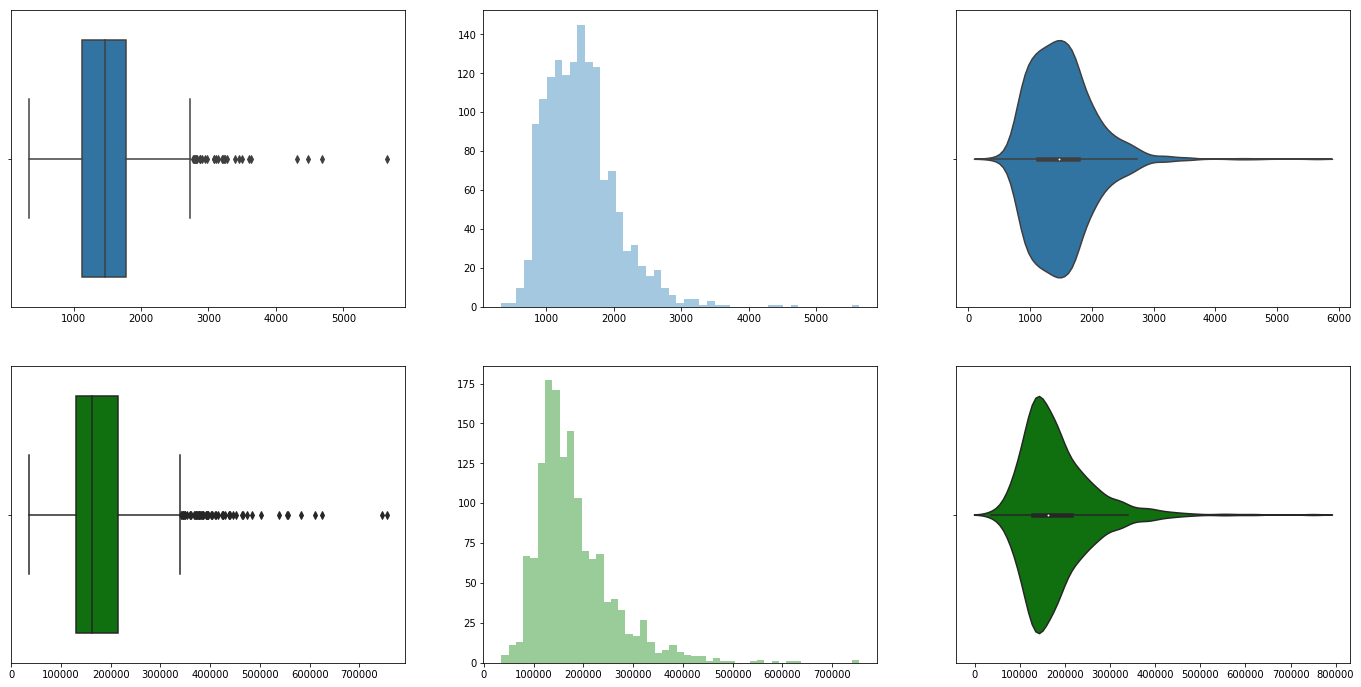

In [6]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(houseGrLivArea, orient = "h", ax = axes[0,0])
sb.distplot(houseGrLivArea, kde = False, ax = axes[0,1])
sb.violinplot(houseGrLivArea, ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(houseSalePrice, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(houseSalePrice, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(houseSalePrice, ax = axes[1,2], color = 'g')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


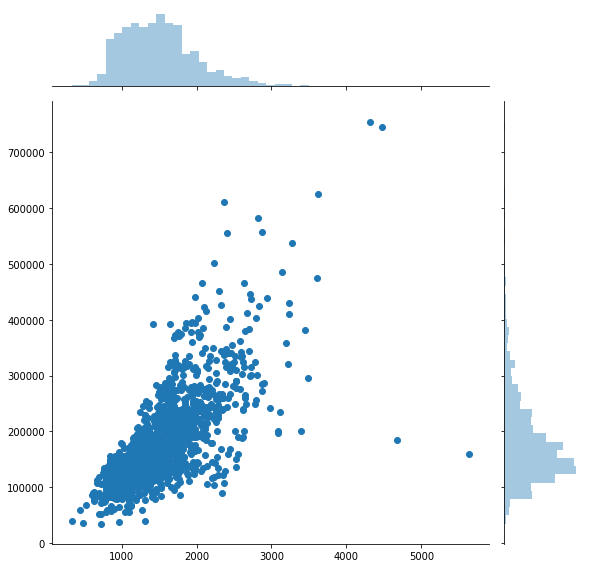

In [18]:
sb.jointplot(houseGrLivArea, houseSalePrice, height = 8)

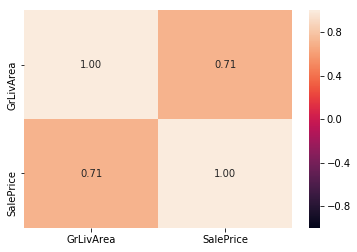

In [8]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([houseGrLivArea, houseSalePrice], axis = 1, join_axes = [houseSalePrice.index])

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [9]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [10]:
# Train Set : 600 samples
houseGrLivArea_train = pd.DataFrame(houseGrLivArea[:1100])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])

# Test Set : 200 samples
houseGrLivArea_test = pd.DataFrame(houseGrLivArea[-360:])
houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])

In [12]:
# Check the sample sizes
print("Train Set :", houseGrLivArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseGrLivArea_test.shape, houseSalePrice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [13]:
linreg.fit(houseGrLivArea_train, houseSalePrice_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]


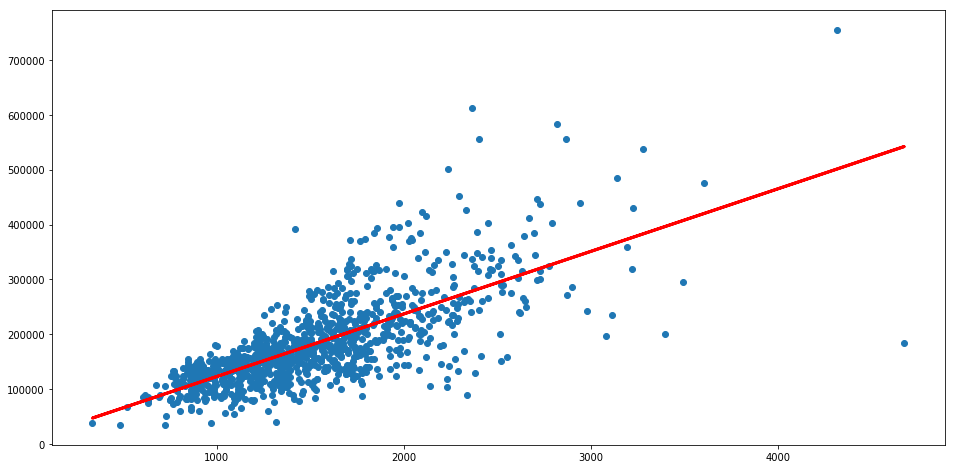

In [17]:
# Formula for the Regression line
regline_x = houseGrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGrLivArea_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

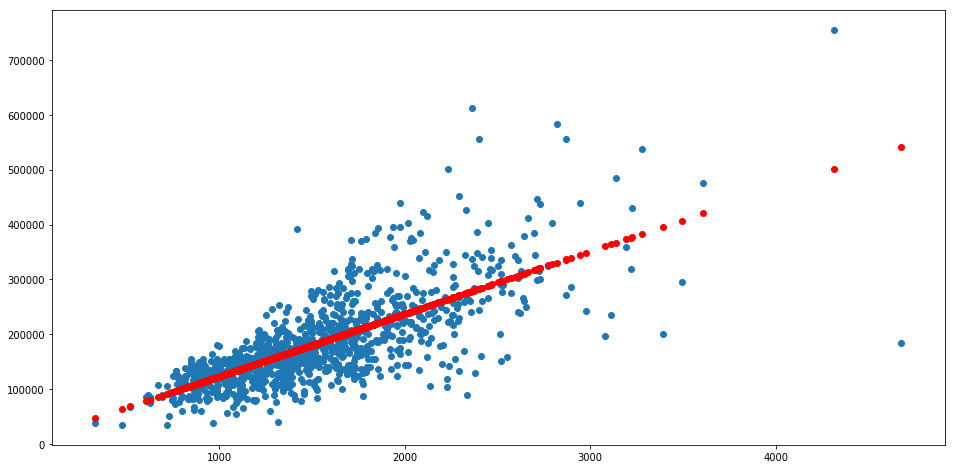

In [19]:
# Predict Total values corresponding to HP Train
houseSalePrice_train_pred = linreg.predict(houseGrLivArea_train)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.scatter(houseGrLivArea_train, houseSalePrice_train_pred, color = "r")
plt.show()

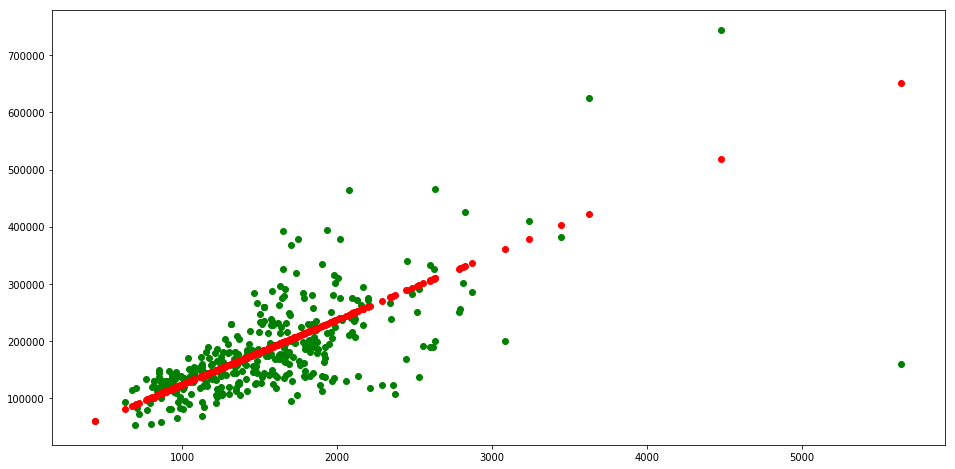

In [20]:
# Predict Total values corresponding to HP Test
houseSalePrice_test_pred = linreg.predict(houseGrLivArea_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseGrLivArea_test, houseSalePrice_test_pred, color = "red")
plt.show()

In [21]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_test, houseSalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(houseSalePrice_test, houseSalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.40117720006925806
Mean Squared Error (MSE) 	: 3737081522.296089
Root Mean Squared Error (RMSE) 	: 61131.67364219705


Intercept of Regression 	: b =  [14650.88113607]
Coefficients of Regression 	: a =  [[110.3669492]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5106156556320507
Mean Squared Error (MSE) 	: 3188418755.113611

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4696199200920985
Mean Squared Error (MSE) 	: 3009574070.5273504



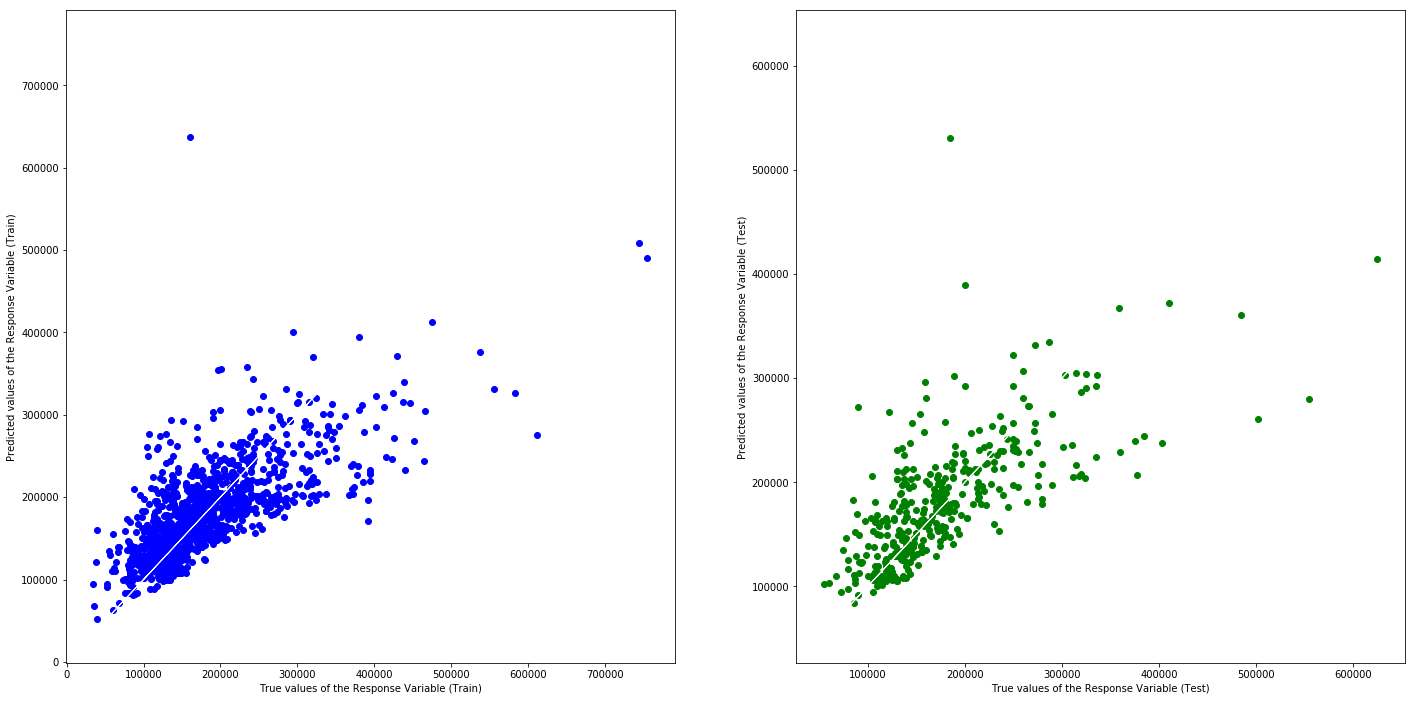

In [22]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
sale = pd.DataFrame(houseData['SalePrice'])   # Response
gr = pd.DataFrame(houseData['GrLivArea'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(gr, sale, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [23]:
# Extract Response and Predictors
y = pd.DataFrame(houseData["SalePrice"])
X = pd.DataFrame(houseData[["LotArea", "TotalBsmtSF", "GarageArea"]])

In [24]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1095, 1) (1095, 3)
Test Set  : (365, 1) (365, 3)


In [25]:
y_train.describe()
X_train.describe()

,LotArea,TotalBsmtSF,GarageArea
count,1095.000000,1095.000000,1095.000000
mean,10724.771689,1060.971689,475.031963
std,10706.450799,448.441123,214.824774
min,1300.000000,0.000000,0.000000
25%,7659.500000,798.000000,336.000000
50%,9591.000000,993.000000,480.000000
75%,11697.000000,1310.000000,576.000000
max,215245.000000,6110.000000,1418.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


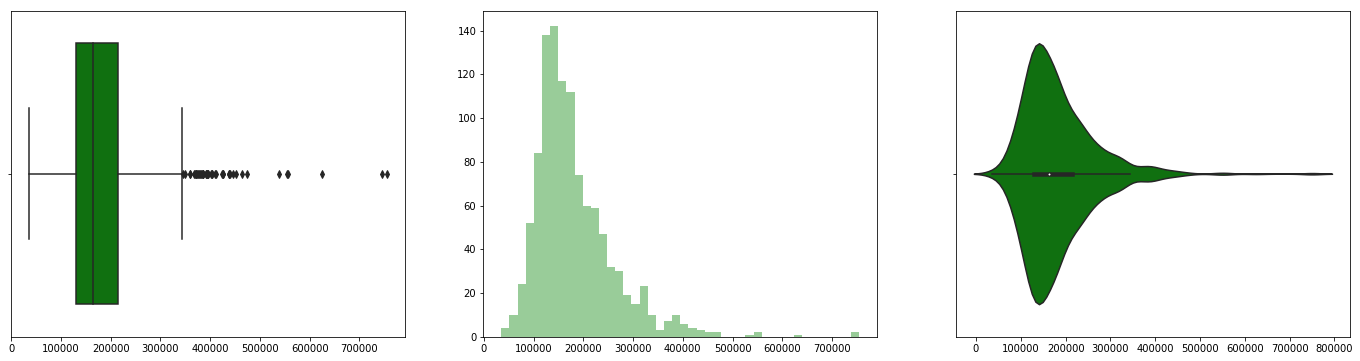

In [26]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(y_train, orient = "h", ax = axes[0], color = "g")
sb.distplot(y_train, kde = False, ax = axes[1], color = "g")
sb.violinplot(y_train, ax = axes[2], color = "g")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


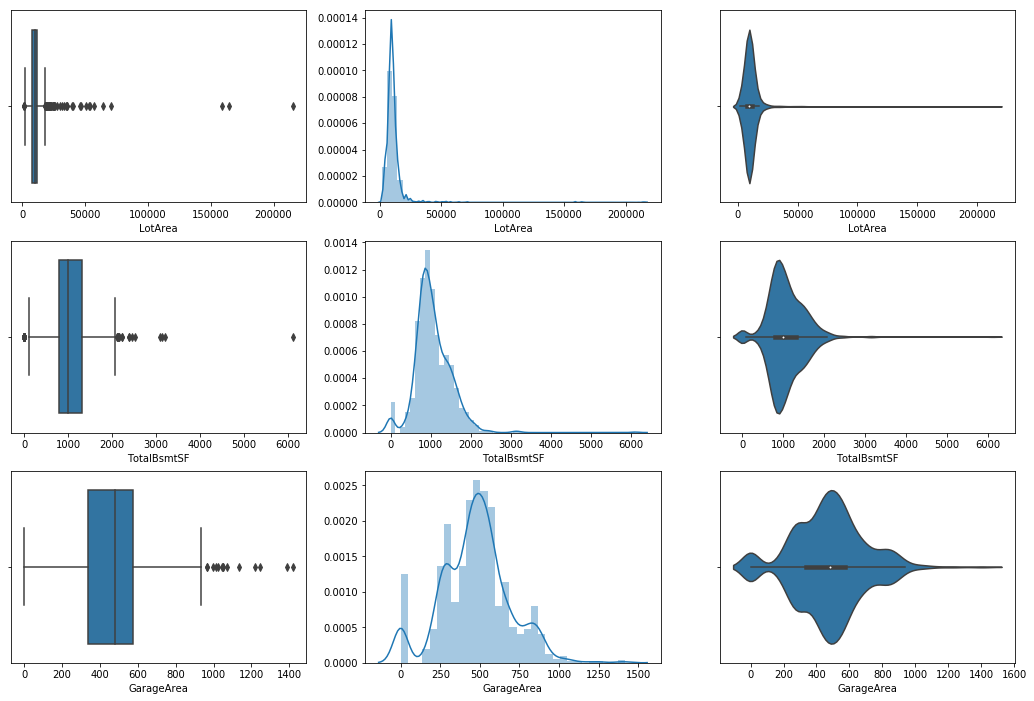

In [27]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(3, 3, figsize=(18, 12))

count = 0
for var in X_train:
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

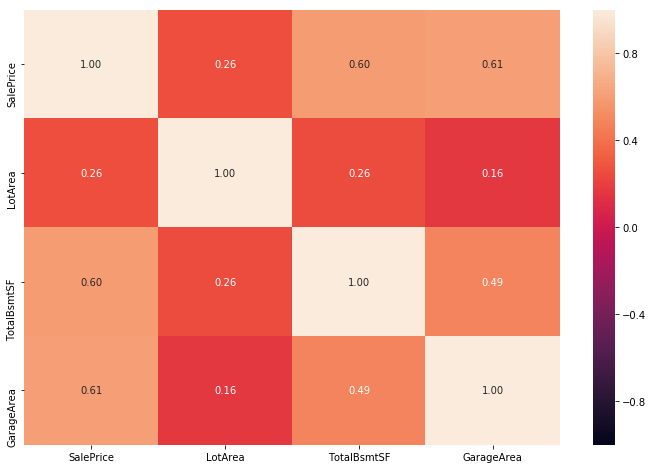

In [28]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1, join_axes = [y_train.index])

f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

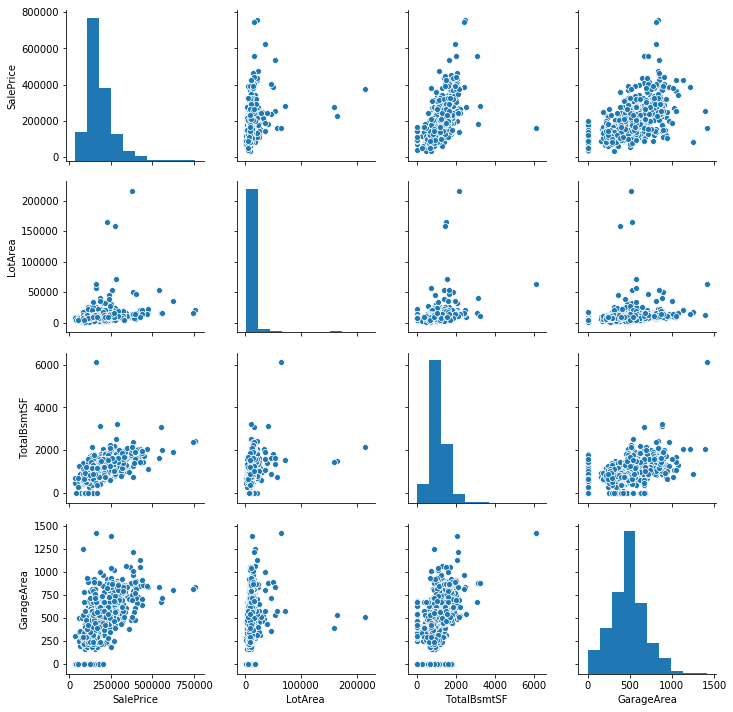

In [29]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1, join_axes = [y_train.index])
sb.pairplot(data = trainDF)

In [30]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [29999.77317459]
Coefficients of Regression 	: a =  [[  0.70536485  67.10508063 152.79986387]]



,Predictors,Coefficients
0,LotArea,0.705365
1,TotalBsmtSF,67.105081
2,GarageArea,152.799864


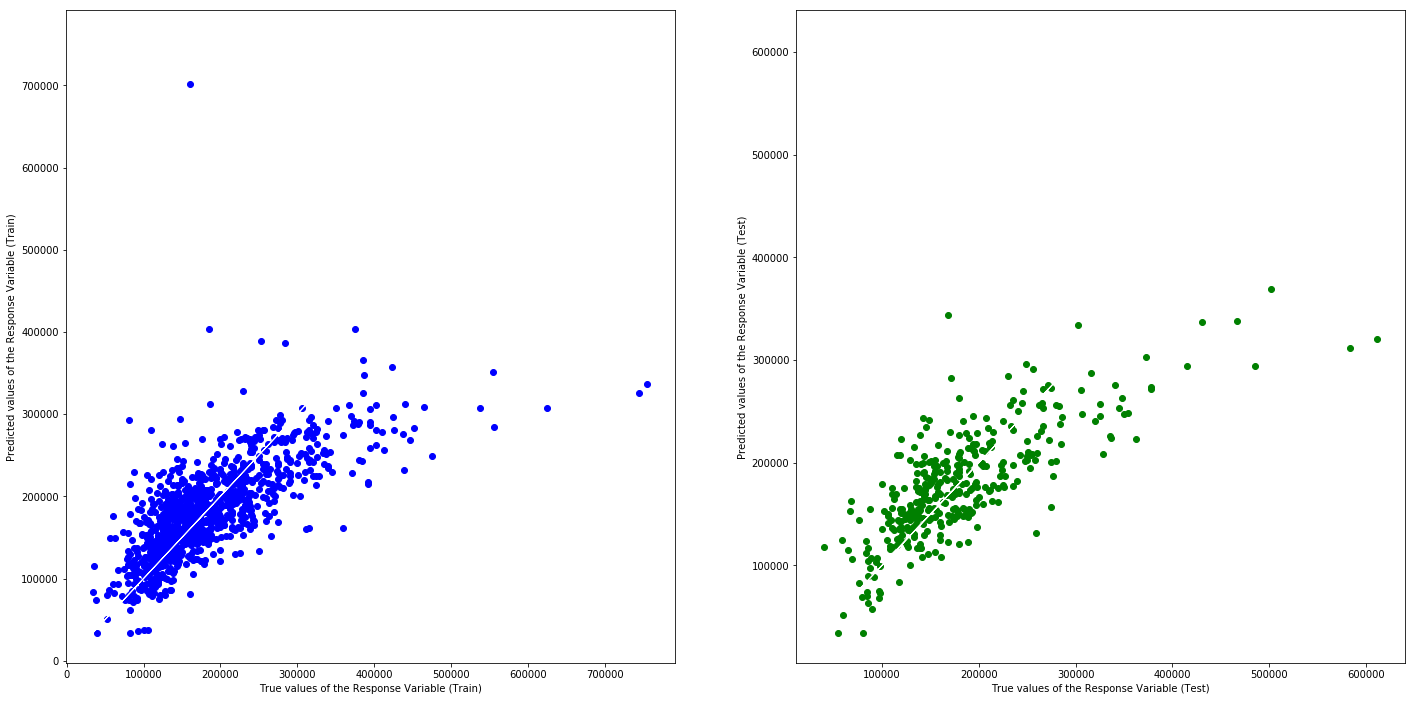

In [31]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [32]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5003075699244798
Mean Squared Error (MSE) 	: 3194278862.8819933

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5879361769731526
Mean Squared Error (MSE) 	: 2491963478.040222



Intercept of Regression 	: b =  [22528.89276718]
Coefficients of Regression 	: a =  [[104.72313279]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4845152283544837
Mean Squared Error (MSE) 	: 3198675763.5139995

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5506791699576956
Mean Squared Error (MSE) 	: 2970130444.1681724



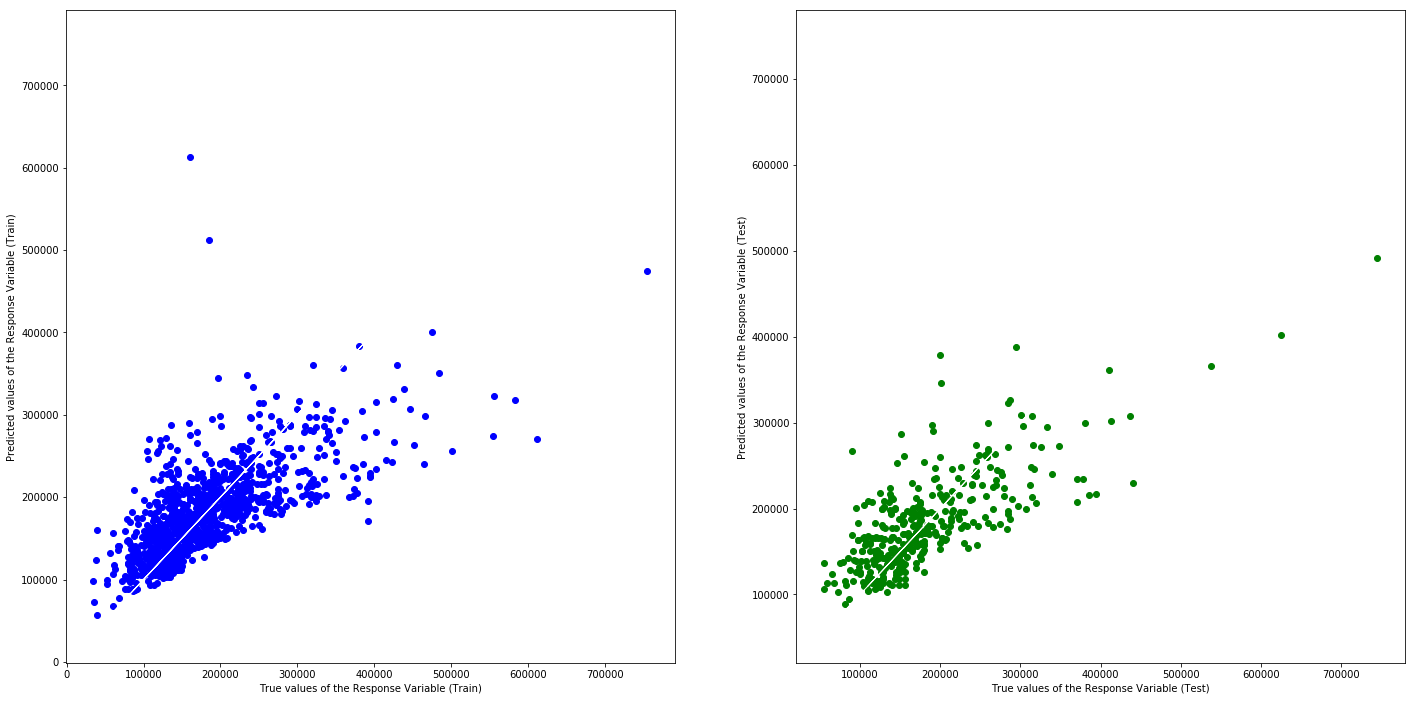

In [33]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
sale = pd.DataFrame(houseData['SalePrice'])   # Response
la = pd.DataFrame(houseData['LotArea'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(gr, sale, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [18171.15810828]
Coefficients of Regression 	: a =  [[107.31465991]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4829495370153579
Mean Squared Error (MSE) 	: 3361572207.418158

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5674396094100959
Mean Squared Error (MSE) 	: 2474749939.6388993



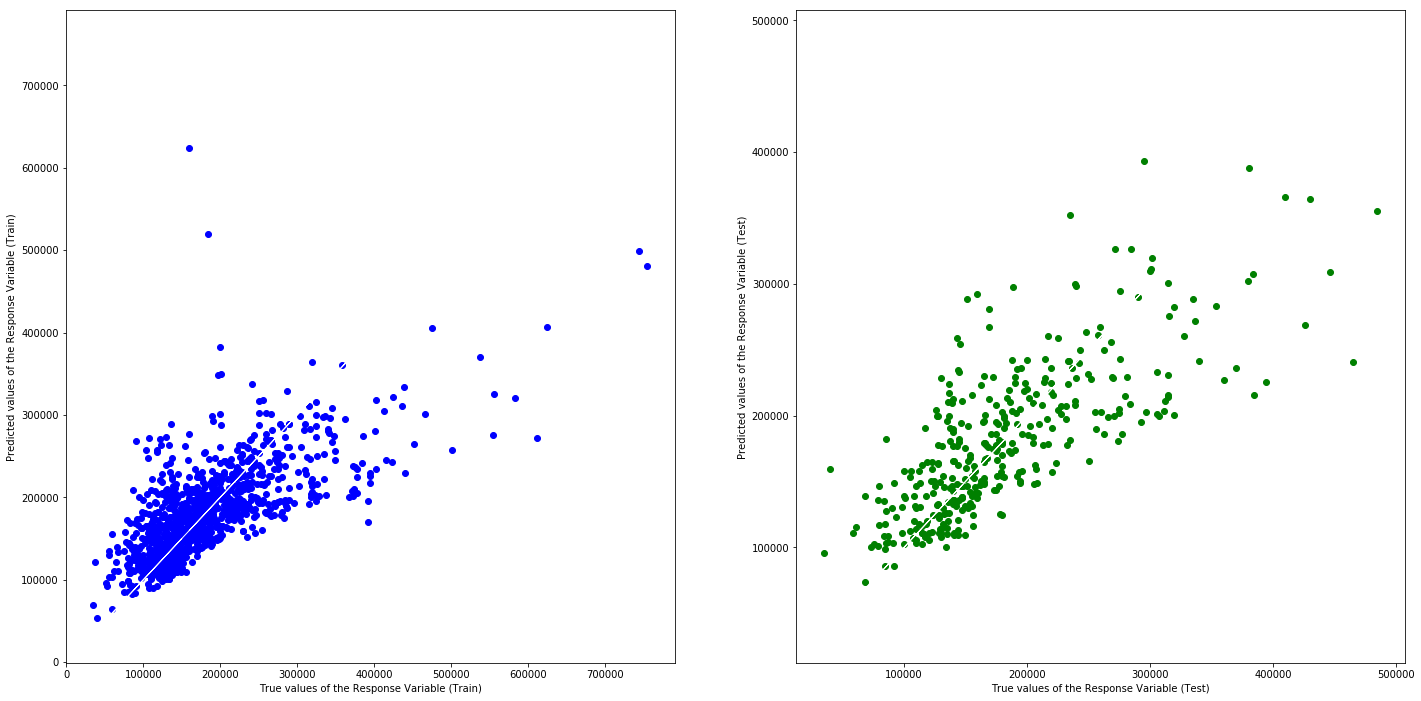

In [34]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
sale = pd.DataFrame(houseData['SalePrice'])   # Response
tb = pd.DataFrame(houseData['TotalBsmtSF'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(gr, sale, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [17250.67545817]
Coefficients of Regression 	: a =  [[108.21297921]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5009882007657944
Mean Squared Error (MSE) 	: 2991209533.1795645

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5046300363811547
Mean Squared Error (MSE) 	: 3587453485.720764



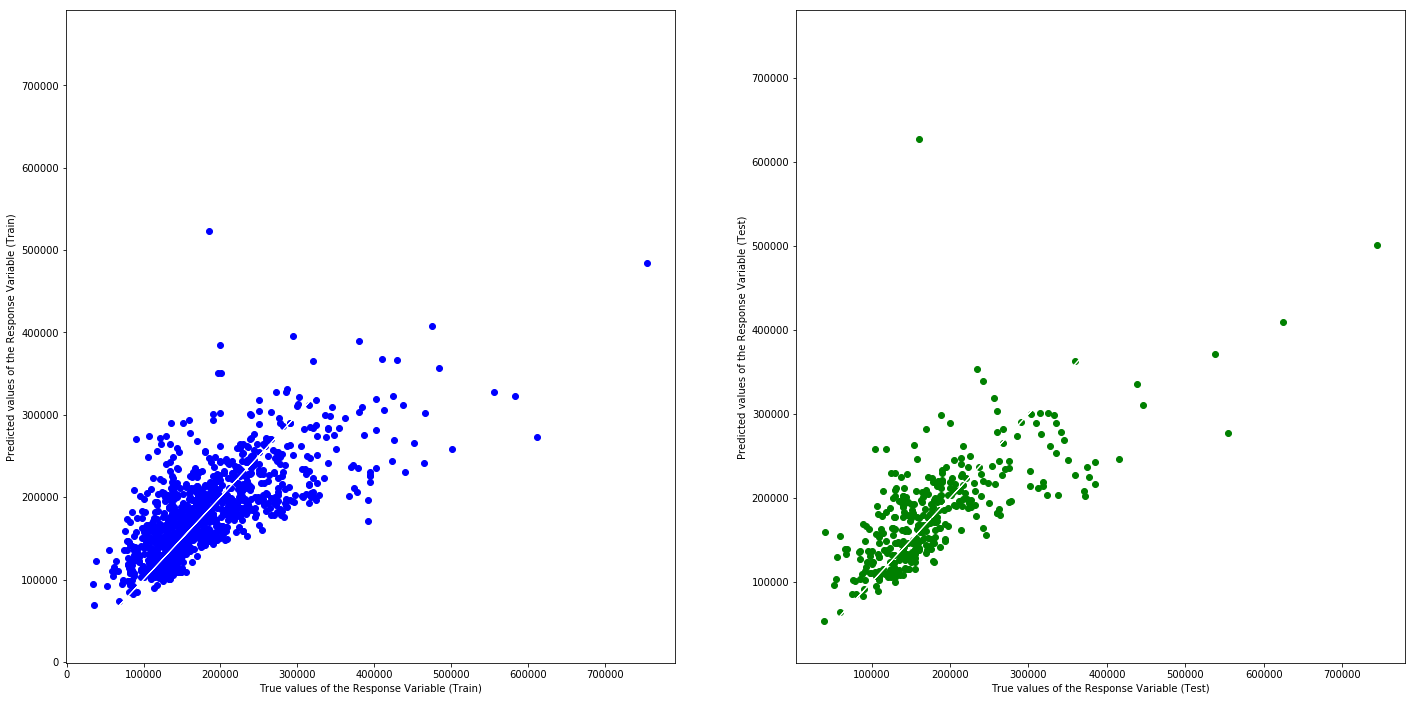

In [35]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
sale = pd.DataFrame(houseData['SalePrice'])   # Response
ga = pd.DataFrame(houseData['GarageArea'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(gr, sale, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()